In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from tqdm import tqdm

from scipy.stats import norm
from sklearn import preprocessing
from scipy.stats import norm
import statistics
from scipy.optimize import curve_fit
from matplotlib.pyplot import cm
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the notebook wider
plt.style.use('default')
%matplotlib inline 
#makes plots fit the page

/tmp/ipykernel_1395093/1017337737.py:16: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import matplotlib.colors as colors

data = np.loadtxt("/work/users/k/b/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0200_sc=-0.3000.dat")
#data = np.loadtxt("fields/ev_c50372.dat")
# figure out the size of grid the X-Y points
x = set(data[:,0])  # sets only have one copy of anything, so if there are repeats, they are removed
y = set(data[:,1])
print(data.shape)
z = data[:,3]       # column 3 = field, 2 = potential
# reshape the zvals array into the appropriate shape, and find the boundaries
zvals = z.reshape(len(x), len(y))
zvals[zvals<0] = 0
# imshow plots columns and rows opposite to how you'd expect; so transpose them
zvals = zvals.T
# stack so we can plot the data from one half of the detector (positive r-values only)
zvals_neg = np.fliplr(zvals)
zvals_full = np.hstack((zvals_neg,zvals))
bounds = (-1*max(x), max(x), min(y), max(y))
print(bounds)

fig = plt.figure(figsize=(10,7))
ip = plt.imshow(zvals_full, norm=colors.LogNorm(),
                extent=bounds,   # set the boundaries of the edges of the 'image' data
                origin="lower",  # tell matplotlib where [0,0] is in the bottom
                cmap='jet')      # use the 'jet color map scheme
plt.xlabel("Radial position [mm]", size=13)
plt.ylabel("Axial position [mm]", labelpad=8,  size=13)
plt.colorbar()
plt.show()

/tmp/ipykernel_1395093/3998345590.py:3: UserWarning: loadtxt: input contained no data: "/work/users/k/b/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0200_sc=-0.3000.dat"
  data = np.loadtxt("/work/users/k/b/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0200_sc=-0.3000.dat")


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [2]:
data = '/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0200.dat'
data_dir = '/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/'

grids = np.linspace(0.005,0.06,12)
rad =np.array([])
height = np.array([])
pot = np.array([])
grid = np.array([])
field_z=np.array([])
field=np.array([])
field_r=np.array([])


# r (mm), z (mm), V (V),  E (V/cm), E_r (V/cm), E_z (V/cm)\n"
for g in grids:
    formatted_g = "{:.4f}".format(g)  # This will format the grid value to 4 decimal places
    file_load = data_dir + "ev_fin_grid="+ formatted_g +"_sc=-0.5000.dat"
    print(file_load)
    data = np.loadtxt(file_load)
    r = data[:,0]  # sets only have one copy of anything, so if there are repeats, they are removed
    z = data[:,1]
    v = data[:,2]
    e = data[:,3]
    e_r=data[:,4]
    e_z=data[:,5]
    rad = np.append(rad, r)
    height = np.append(height, z)
    pot = np.append(pot, v)
    a=np.empty(len(r)); a.fill(g)
    grid = np.append(grid, a)
    field = np.append(field, e)
    field_r = np.append(field_r, e_r)
    field_z = np.append(field_z, e_z)

/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0050_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0100_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0150_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0200_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0250_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0300_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0350_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0400_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0450_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0500_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0550_sc=-0.5000.dat
/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0600_sc=-0.5000.dat


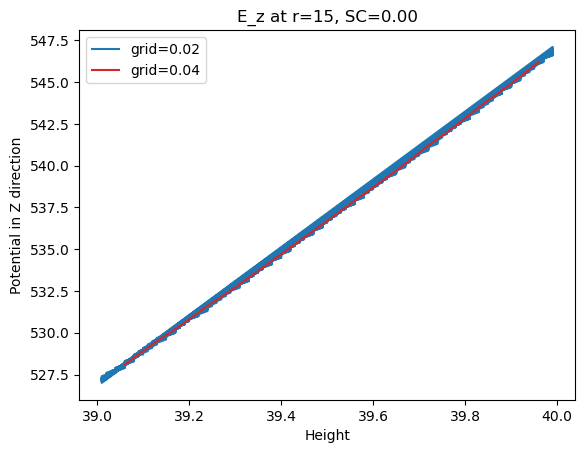

In [29]:
cut1 = ((grid==0.0050) & (rad> 14.98) & (rad<15.02) &(height<40) & (height>39))
cut2 = ((grid==0.0600) & (rad> 14.98) & (rad<15.02)& (height<40) & (height>39))
plt.plot(height[cut1], field[cut1], '-', markersize=4, color='tab:blue', label='grid='+str(0.020))
plt.plot(height[cut2], field[cut2], '-', markersize=4, color='tab:red', label='grid='+str(0.040))

plt.xlabel('Height')
plt.ylabel('Potential in Z direction')
# plt.xlim(0,0.5)
# plt.vlines(height[cut1],-5,0)
plt.title("E_z at r=15, SC=0.00")
plt.legend()
# plt.savefig("ez_sc0.png")

100%|██████████| 12/12 [00:04<00:00,  2.60it/s]


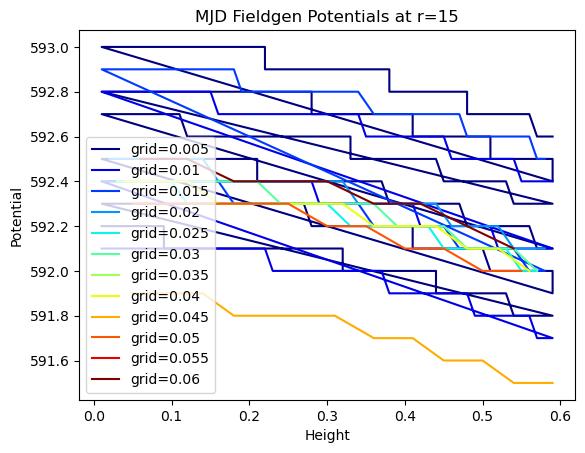

In [24]:
color_array=np.linspace(0,1,11)
cmap = plt.cm.tab20b
color = iter(cm.jet(np.linspace(0, 1, len(np.unique(grid)))))
for g in tqdm(np.unique(grid)):
    cut = ((grid==g) & (rad> 14.98) & (rad<15.02) & (height<0.6) &(height>0) )
    hei_v = height[cut]
    v_1 = pot[cut]
    # time_array=np.linspace(0,(len(f_z)-1)*10,len(f_z))
    c = next(color)
    plt.plot(hei_v, field[cut],'-', markersize=4, c=c, label='grid='+str(round(g,3)))
    # plt.plot(g, vel_r[0],'o', markersize=5, c=c, label='grid='+str(g))
plt.xlabel('Height')
plt.ylabel('Potential')
# plt.xlim(0,0.5)
# plt.ylim(0.06,0.10)
plt.title("MJD Fieldgen Potentials at r=15")
plt.legend()
# plt.savefig(analy_dir+'figs/potential.pdf')

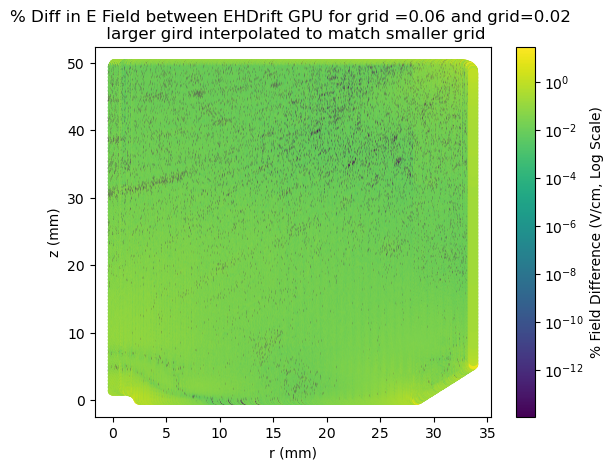

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm

# Assuming 'rad', 'height', 'field', and 'grid' are already defined

# Filter data for grid=0.02 and grid=0.06
mask_0005 = (grid == 0.005) & (field>0)
mask_006 = (grid == 0.06) & (field>0)

r_0005, z_0005, field_0005 = rad[mask_0005], height[mask_0005], field[mask_0005]
r_006, z_006, field_006 = rad[mask_006], height[mask_006], field[mask_006]

# Interpolate data from 0.06 grid to match the 0.02 grid
points_006 = np.column_stack((r_006, z_006))  # Grid points for 0.06 grid data
field_006_interpolated = griddata(points_006, field_006, (r_0005, z_0005), method='linear')

# Calculate field differences
field_diff_grid_comp = field_0005 - field_006_interpolated

# Ensure all values are positive for LogNorm
field_diff_abs_grid_comp = np.abs(field_diff_grid_comp/field_0005)*100


# Slicing the data to plot every 10th point
step = 100
r_0005 = r_0005[::step]
z_0005 = z_0005[::step]
field_diff_abs_grid_comp = field_diff_abs_grid_comp[::step]

# Plotting with logarithmic color scale
plt.scatter(r_0005, z_0005, c=field_diff_abs_grid_comp, cmap='viridis', norm=LogNorm())
plt.colorbar(label='% Field Difference (V/cm, Log Scale)')
plt.xlabel('r (mm)')
plt.ylabel('z (mm)')
plt.title('% Diff in E Field between EHDrift GPU for grid =0.06 and grid=0.02 \n larger gird interpolated to match smaller grid')
plt.savefig('figs/ehd_gpu60mvs05m_6m_inter.png', dpi=200)


In [49]:
print(max(field_diff_abs_grid_comp))

7.994700740410578


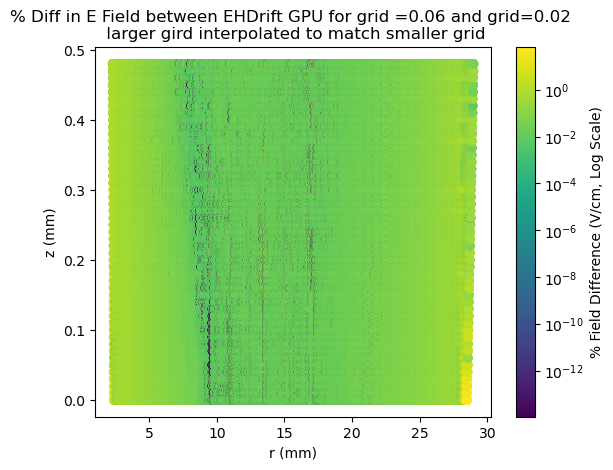

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm

# Assuming 'rad', 'height', 'field', and 'grid' are already defined

# Filter data for grid=0.02 and grid=0.06
mask_0005 = (grid == 0.005) & (field>0) & (height<0.5)
mask_006 = (grid == 0.06) & (field>0) & (height<0.5)

r_0005, z_0005, field_0005 = rad[mask_0005], height[mask_0005], field[mask_0005]
r_006, z_006, field_006 = rad[mask_006], height[mask_006], field[mask_006]

# Interpolate data from 0.06 grid to match the 0.02 grid
points_006 = np.column_stack((r_006, z_006))  # Grid points for 0.06 grid data
field_006_interpolated = griddata(points_006, field_006, (r_0005, z_0005), method='linear')

# Calculate field differences
field_diff_grid_comp = field_0005 - field_006_interpolated

# Ensure all values are positive for LogNorm
field_diff_abs_grid_comp = np.abs(field_diff_grid_comp/field_0005)*100


# Slicing the data to plot every 10th point
step = 1
r_0005 = r_0005[::step]
z_0005 = z_0005[::step]
field_diff_abs_grid_comp = field_diff_abs_grid_comp[::step]

# Plotting with logarithmic color scale
plt.scatter(r_0005, z_0005, c=field_diff_abs_grid_comp, cmap='viridis', norm=LogNorm())
plt.colorbar(label='% Field Difference (V/cm, Log Scale)')
plt.xlabel('r (mm)')
plt.ylabel('z (mm)')
plt.title('% Diff in E Field between EHDrift GPU for grid =0.06 and grid=0.02 \n larger gird interpolated to match smaller grid')
plt.savefig('figs/ehd_gpu60mvs05m_6m_inter_surface.png', dpi=200)


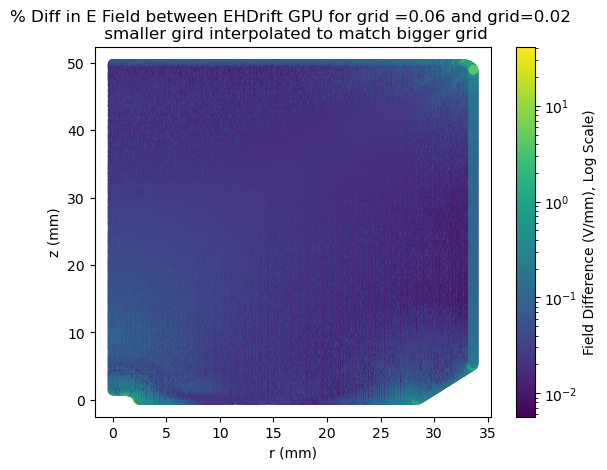

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm

# Filter data for grid=0.02 and grid=0.06
mask_002 = (grid == 0.005) & (field>0)
mask_006 = (grid == 0.06) & (field>0)

r_002, z_002, field_002 = rad[mask_002], height[mask_002], field[mask_002]
r_006, z_006, field_006 = rad[mask_006], height[mask_006], field[mask_006]

# Interpolate data from 0.02 grid to match the 0.06 grid
points_002 = np.column_stack((r_002, z_002))  # Grid points for 0.02 grid data
field_002_interpolated = griddata(points_002, field_002, (r_006, z_006), method='linear')

# Calculate field differences
field_diff = field_006 - field_002_interpolated

# Ensure all values are positive for LogNorm
field_diff_abs = np.abs(field_diff/field_002_interpolated) * 100


# Slicing the data to plot every 10th point
step = 1
r_006 = r_006[::step]
z_006 = z_006[::step]
field_diff_abs = field_diff_abs[::step]

# Plotting with logarithmic color scale
plt.scatter(r_006, z_006, c=field_diff_abs, cmap='viridis', norm=LogNorm())
plt.colorbar(label='Field Difference (V/mm), Log Scale)')
plt.xlabel('r (mm)')
plt.ylabel('z (mm)')
plt.title('% Diff in E Field between EHDrift GPU for grid =0.06 and grid=0.02 \n smaller gird interpolated to match bigger grid')
# plt.show()
plt.savefig('figs/ehd_gpu60mvs05m_6m_outer.png', dpi=200)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm
from tqdm import tqdm

data_0050 = np.loadtxt('/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0050_sc=-0.5000.dat')
# Assuming the columns are similar, extract r, z, and field
r_0050 = data_0050[:,0]
z_0050 = data_0050[:,1]
field_0050 = data_0050[:,2]

data_0600 = np.loadtxt('/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0600_sc=-0.5000.dat')
# Assuming the columns are similar, extract r, z, and field
r_0600 = data_0600[:,0]
z_0600 = data_0600[:,1]
field_0600 = data_0600[:,2]

# Filter data for grid=0.02 and grid=0.06
mask_0050 = (field_0050>0) 
mask_0600 = (field_0600>0)

r_0050, z_0050, field_0050 = r_0050[mask_0050], z_0050[mask_0050], field_0050[mask_0050]
r_0600, z_0600, field_0600 = r_0600[mask_0600], z_0600[mask_0600], field_0600[mask_0600]


# Define bin sizes and create bins for r and z
bin_size = 0.06
r_bins = np.arange(min(r_0050), max(r_0050) + bin_size, bin_size)
z_bins = np.arange(min(z_0050), max(z_0050) + bin_size, bin_size)

# Digitize the r and z values to find their bin indices
r_idx = np.digitize(r_0050, r_bins) - 1
z_idx = np.digitize(z_0050, z_bins) - 1

# Initialize array to store averaged field values
field_averaged = np.zeros((len(z_bins)-1, len(r_bins)-1))

# Accumulate field values in their respective bins
np.add.at(field_averaged, (z_idx, r_idx), field_0050)

# Count the number of values in each bin
counts = np.zeros_like(field_averaged)
np.add.at(counts, (z_idx, r_idx), 1)

# Avoid division by zero
counts[counts == 0] = 1

# Calculate average field value in each bin
field_averaged /= counts

# Initialize an array to map averaged values back to the 0.06 grid
field_mapped_to_0600 = np.zeros_like(field_0600)

# Find the closest bin center for each point in the 0.06 grid
for i in tqdm(range(len(field_0600))):
    r_bin_idx = np.argmin(np.abs(r_bins - r_0600[i])) - 1
    z_bin_idx = np.argmin(np.abs(z_bins - z_0600[i])) - 1
    field_mapped_to_0600[i] = field_averaged[z_bin_idx, r_bin_idx]

# Calculate field differences
field_diff = field_0600 - field_mapped_to_0600
field_diff_abs = np.abs(field_diff / field_mapped_to_0600) * 100

100%|██████████| 490169/490169 [00:03<00:00, 144235.13it/s]
/tmp/ipykernel_1429265/3788059689.py:63: RuntimeWarning: divide by zero encountered in divide
  field_diff_abs = np.abs(field_diff / field_mapped_to_0600) * 100


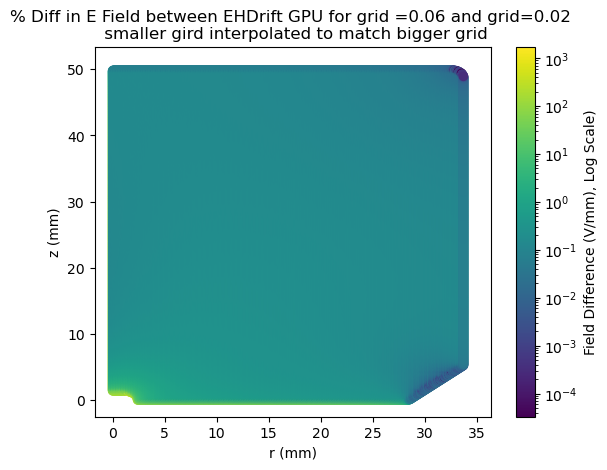

In [15]:
# Plotting with logarithmic color scale
cut = (field_diff_abs!= float('inf'))
plt.scatter(r_0600[cut], z_0600[cut], c=field_diff_abs[cut], cmap='viridis', norm=LogNorm())
plt.colorbar(label='Field Difference (V/mm), Log Scale)')
plt.xlabel('r (mm)')
plt.ylabel('z (mm)')
plt.title('% Diff in E Field between EHDrift GPU for grid =0.06 and grid=0.02 \n smaller gird interpolated to match bigger grid')
# plt.show()
plt.savefig('figs/ehd_gpu60mvs05m_6m_outer.png', dpi=400)


In [11]:
print(z_0600[field_diff_abs == max(field_diff_abs[cut])])

[1.26]


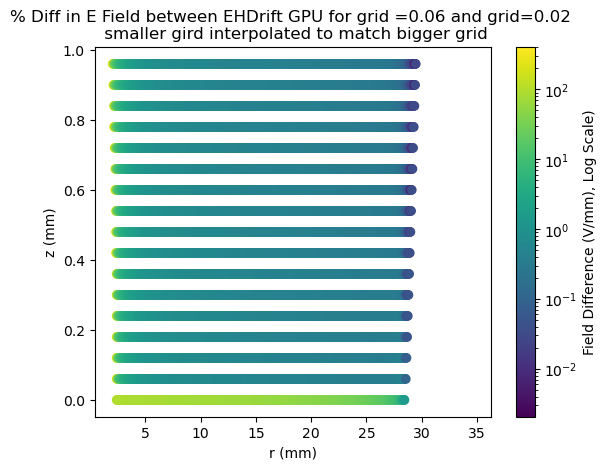

In [16]:
# Plotting with logarithmic color scale
cut = (field_diff_abs!= float('inf')) & (z_0600<1)
plt.scatter(r_0600[cut], z_0600[cut], c=field_diff_abs[cut], cmap='viridis', norm=LogNorm())
plt.colorbar(label='Field Difference (V/mm), Log Scale)')
plt.xlabel('r (mm)')
plt.ylabel('z (mm)')
plt.title('% Diff in E Field between EHDrift GPU for grid =0.06 and grid=0.02 \n smaller gird interpolated to match bigger grid')
# plt.show()
plt.savefig('figs/ehd_gpu60mvs05m_6m_outer_surface.png', dpi=400)


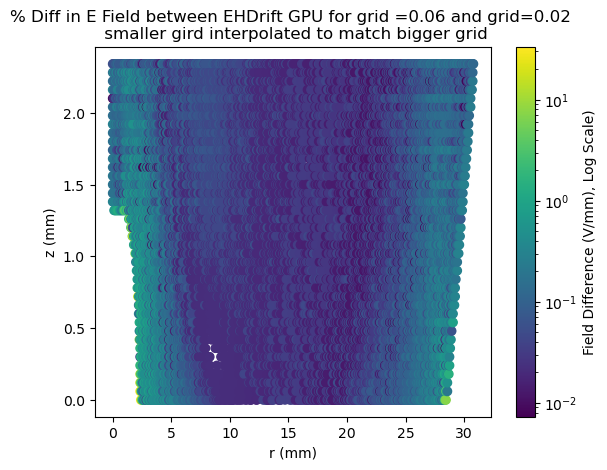

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm

# Filter data for grid=0.02 and grid=0.06
mask_002 = (grid == 0.005) & (field>0) & (height<2.4)
mask_006 = (grid == 0.06) & (field>0) & (height<2.4)

r_002, z_002, field_002 = rad[mask_002], height[mask_002], field[mask_002]
r_006, z_006, field_006 = rad[mask_006], height[mask_006], field[mask_006]

# Interpolate data from 0.02 grid to match the 0.06 grid
points_002 = np.column_stack((r_002, z_002))  # Grid points for 0.02 grid data
field_002_interpolated = griddata(points_002, field_002, (r_006, z_006), method='linear')

# Calculate field differences
field_diff = field_006 - field_002_interpolated

# Ensure all values are positive for LogNorm
field_diff_abs = np.abs(field_diff/field_002_interpolated) * 100


# Slicing the data to plot every 10th point
step = 1
r_006 = r_006[::step]
z_006 = z_006[::step]
field_diff_abs = field_diff_abs[::step]

# Plotting with logarithmic color scale
plt.scatter(r_006, z_006, c=field_diff_abs, cmap='viridis', norm=LogNorm())
plt.colorbar(label='Field Difference (V/mm), Log Scale)')
plt.xlabel('r (mm)')
plt.ylabel('z (mm)')
plt.title('% Diff in E Field between EHDrift GPU for grid =0.06 and grid=0.02 \n smaller gird interpolated to match bigger grid')
# plt.show()
plt.savefig('figs/ehd_gpu60mvs05m_outer_smallz.png', dpi=200)


Condition met!


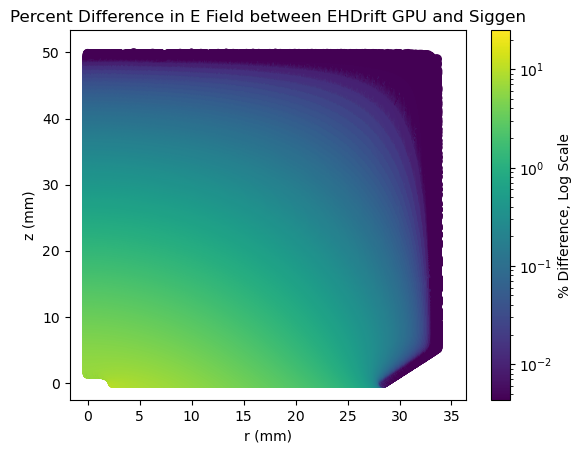

In [18]:
# Load the additional data
data_siggen = np.loadtxt('/global/u1/k/kbhimani/siggen_ccd/Analysis/data/ev_20m_sc_-0.5.dat')
# Assuming the columns are similar, extract r, z, and field
r_siggen = data_siggen[:,0]
z_siggen = data_siggen[:,1]
field_siggen = data_siggen[:,2]
data_gpu = np.loadtxt('/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0200_sc=-0.5000.dat')
# Assuming the columns are similar, extract r, z, and field
r_gpu = data_gpu[:,0]
z_gpu = data_gpu[:,1]
field_gpu = data_gpu[:,2]
mask_002_siggen = (field_siggen>0)  
mask_002_gpu = (field_gpu>0)
# Ensure the array sizes are the same after masking
if field_gpu[mask_002_gpu].shape == field_siggen[mask_002_siggen].shape:
    print("Condition met!")
    field_diff_siggen = field_gpu[mask_002_gpu] - field_siggen[mask_002_siggen]
    field_diff_siggen_abs = np.abs(field_diff_siggen / field_siggen[mask_002_siggen]) * 100

    # Slicing the data to plot every 10th point
    step = 1
    r_siggen_sliced = r_siggen[mask_002_siggen][::step]
    z_siggen_sliced = z_siggen[mask_002_siggen][::step]
    field_diff_siggen_abs_sliced = field_diff_siggen_abs[::step]

    # Plotting the differences
    plt.scatter(r_siggen_sliced, z_siggen_sliced, c=field_diff_siggen_abs_sliced, cmap='viridis',norm=LogNorm())
    plt.colorbar(label='% Difference, Log Scale') #, Log Scale
    plt.xlabel('r (mm)')
    plt.ylabel('z (mm)')
    plt.title('Percent Difference in E Field between EHDrift GPU and Siggen')
    # plt.show()
    plt.savefig('figs/ehd_gpuvssiggen.png', dpi=200)
else:
    print("The filtered data arrays do not match in size. Interpolation might be necessary.")

In [150]:
# Load the additional data
data_cpu = np.loadtxt('/global/u1/k/kbhimani/siggen_ccd/Analysis/data/ehd_cpu_ev_fin_grid=0.0200_sc=-0.5000_cth=0008_flat_pc.dat')
# Assuming the columns are similar, extract r, z, and field
r_cpu = data_cpu[:,0]
z_cpu = data_cpu[:,1]
field_cpu = data_cpu[:,3]

data_gpu = np.loadtxt('/pscratch/sd/k/kbhimani/siggen_ccd_data/fields/ev_fin_grid=0.0200_sc=-0.5000_cth=0008_flat_pc.dat')
# Assuming the columns are similar, extract r, z, and field
r_gpu = data_gpu[:,0]
z_gpu = data_gpu[:,1]
field_gpu = data_gpu[:,3]

# Correcting the mask conditions
mask_002_cpu = (field_cpu > 0)
mask_002_gpu = (field_gpu > 0)
print(len(field_cpu))
print(len(field_gpu))
# Ensure the array sizes are the same after masking
if field_cpu[mask_002_cpu].shape == field_gpu[mask_002_gpu].shape:
    print("Condition met!")
    field_diff_siggen = field_gpu[mask_002_gpu] - field_cpu[mask_002_cpu]
    field_diff_siggen_abs = np.abs(field_diff_siggen)

    # Slicing the data to plot every 100th point
    step = 10
    r_cpu_sliced = r_cpu[mask_002_cpu][::step]
    z_cpu_sliced = z_cpu[mask_002_cpu][::step]
    field_diff_siggen_abs_sliced = field_diff_siggen_abs[::step]
    
    # Assuming you have determined appropriate vmin and vmax values
    vmin_value = 1e-3
    vmax_value = 12 
    norm = LogNorm(vmin=vmin_value, vmax=vmax_value)
    # Plotting the differences
    plt.scatter(r_cpu_sliced, z_cpu_sliced, c=field_diff_siggen_abs_sliced, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
    plt.colorbar(label='% Difference')
    plt.xlabel('r (mm)')
    plt.ylabel('z (mm)')
    plt.title('Percent Difference in V between EHDrift GPU and EHDrift CPU\n Convergence threshold 0.0008')
    plt.savefig('figs/ehd_gpuvscpu_cth=0008.png', dpi=200)
else:
    print("The filtered data arrays do not match in size. Interpolation might be necessary.")

4414648
4414648
The filtered data arrays do not match in size. Interpolation might be necessary.


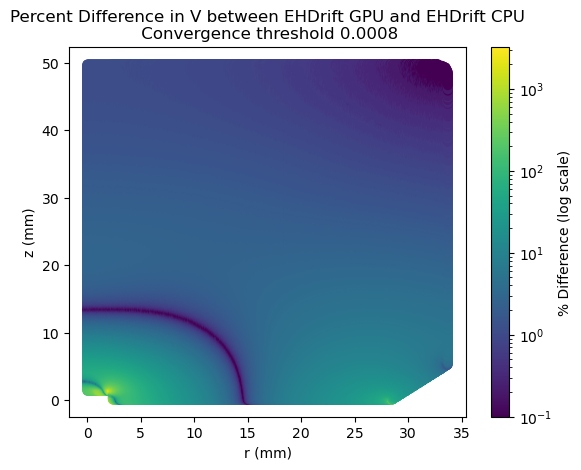

In [166]:
field_diff_siggen = field_gpu - field_cpu
cut = (field_cpu>0) & (field_gpu>0)
field_diff_siggen= field_diff_siggen[cut]
field_diff_siggen_abs = np.abs(field_diff_siggen)

# Slicing the data to plot every 100th point
step = 10
r_cpu_sliced = r_cpu[cut][::step]
z_cpu_sliced = z_cpu[cut][::step]
field_diff_siggen_abs_sliced = field_diff_siggen_abs[::step]

# Assuming you have determined appropriate vmin and vmax values
vmin_value = 1e-3
vmax_value = 12 
norm = LogNorm(vmin=vmin_value, vmax=vmax_value)
# Plotting the differences
plt.scatter(r_cpu_sliced, z_cpu_sliced, c=field_diff_siggen_abs_sliced, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
plt.colorbar(label='% Difference (log scale)')
plt.xlabel('r (mm)')
plt.ylabel('z (mm)')
plt.title('Difference in V between EHDrift GPU and EHDrift CPU\n Convergence threshold 0.0008')
plt.savefig('figs/ehd_gpuvscpu_cth=0008_cyl_pc_log.png', dpi=200)


In [163]:
print("{:.20f}".format(np.max(field_diff_siggen_abs)))

434.58173349279280728297


In [122]:
print(-np.sort(-field_diff_siggen_abs))

[25.         20.         13.79310345 ...  0.          0.
  0.        ]


In [118]:
diff = np.array([25,2,3])
thres = np.array([0.0008,2,3])

In [78]:
print(field_cpu[mask_002_cpu][field_diff_siggen_abs==np.max(field_diff_siggen_abs)])
print(field_gpu[mask_002_cpu][field_diff_siggen_abs==np.max(field_diff_siggen_abs)])
print(r_cpu[mask_002_cpu][field_diff_siggen_abs==np.max(field_diff_siggen_abs)])
print(z_cpu[mask_002_cpu][field_diff_siggen_abs==np.max(field_diff_siggen_abs)])

[3.6]
[4.]
[2.4]
[0.]


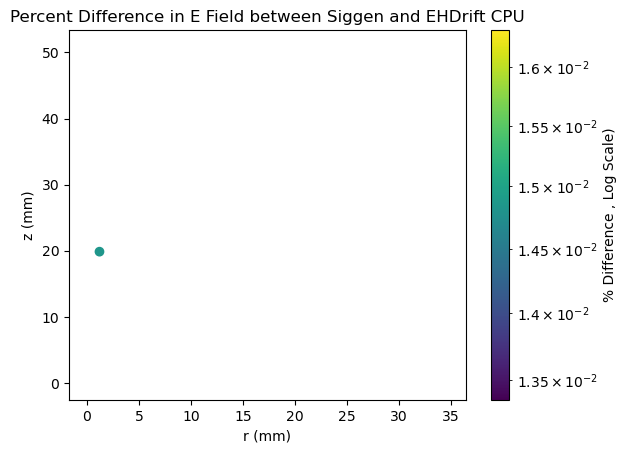

In [60]:
# Load the additional data
data_cpu = np.loadtxt('/global/u1/k/kbhimani/siggen_ccd/Analysis/data/ehd_cpu_ev_fin_grid=0.0200_sc=-0.5000.dat')
# Assuming the columns are similar, extract r, z, and field
r_cpu = data_cpu[:,0]
z_cpu = data_cpu[:,1]
field_cpu = data_cpu[:,2]

data_siggen = np.loadtxt('/global/u1/k/kbhimani/siggen_ccd/Analysis/data/ev_20m_sc_-0.5.dat')
# Assuming the columns are similar, extract r, z, and field
r_siggen = data_siggen[:,0]
z_siggen = data_siggen[:,1]
field_siggen = data_siggen[:,2]

mask_002_cpu = (field_cpu > 0)  
mask_002_siggen = (field_siggen > 0)  

# Ensure the array sizes are the same after masking
if field_cpu[mask_002_cpu].shape == field_siggen[mask_002_siggen].shape:
    field_diff_siggen_cpu = field_cpu[mask_002_cpu] - field_siggen[mask_002_siggen]
    field_diff_siggen_abs = np.abs(field_diff_siggen_cpu / field_siggen[mask_002_siggen]) * 100

    # Slicing the data to plot every 100th point
    step = 10
    r_siggen_sliced = r_siggen[mask_002_siggen][::step]
    z_siggen_sliced = z_siggen[mask_002_siggen][::step]
    field_diff_siggen_abs_sliced = field_diff_siggen_abs[::step]

    # Plotting the differences
    plt.scatter(r_siggen_sliced, z_siggen_sliced, c=field_diff_siggen_abs_sliced, cmap='viridis',norm=LogNorm()) #, norm=LogNorm()
    plt.colorbar(label='% Difference , Log Scale)')
    plt.xlabel('r (mm)')
    plt.ylabel('z (mm)')
    plt.title('Percent Difference in E Field between Siggen and EHDrift CPU')
    plt.savefig('figs/ehd_cpuvssiggen.png', dpi=200)
else:
    print("The filtered data arrays do not match in size. Interpolation might be necessary.")


In [26]:
print(-np.sort(-field_diff_siggen_abs))

[0.02559509 0.02157497 0.01908033 ... 0.         0.         0.        ]


In [18]:
print("{:.20f}".format(np.max(field_diff_siggen_abs)))

0.02559508574352851312


In [9]:
sim_time=1000
time_step_calc = 0.2
n_iter = sim_time/time_step_calc
step_time_out = 10/time_step_calc #out every step for now
time = np.linspace(start=0, stop= n_iter*time_step_calc - step_time_out*time_step_calc, num= (int) (n_iter/step_time_out))

In [3]:
data_dir = '/pscratch/sd/k/kbhimani/siggen_ccd_data/field_test/'
rad =np.array([])
height = np.array([])
field_r=np.array([])
field_z=np.array([])
grid=np.array([])
rho_h=np.array([])
count=0
# data = pd.DataFrame(columns=['r', 'z', 'vel_r', 'vel_z', 'rho'])
data_vel = pd.DataFrame()
for f in tqdm(os.listdir(data_dir)):
    if('grid' in data_dir + f):
        grid_test = float(f.split("_")[1])
        f_grid = data_dir  + f
        # if(grid_test!=0.03):
        #     continue
        for f_g in (os.listdir(f_grid)):
            if('data_iter_' in f_g):
                # time_array.append(f_g.split('_')[2].split('.')[0])
                df=pd.read_csv(data_dir+f+'/'+f_g, delimiter=',',names=['r', 'z', 'e_r', 'e_z', 'rho'])
                # max_df = df[df.rho == df.rho.max()]#.iloc[0]
                # if(len(max_df)>1):
                #     print("Found it!")
                #     max_df = df[df.rho == df.rho.max()].iloc[0]
                #     break
                # if(grid_test==0.03):
                #     print(df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] < 5.02) & (df['z'] > 4.98)])
                #     break
                try:
                    # rad = np.append(rad, max_df.r.values==15)
                    rad_df = df[(df['r'] < 15.02) & (df['r'] > 14.98)]
                    # rad_df = df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] < 0.12) & (df['z'] > 0.08)]
                    # if(grid_test==0.03):
                    #     print("We shoud append", rad_df)
                    #     break
                    rad = np.append(rad, rad_df.r.values)
                    height = np.append(height, rad_df.z.values)
                    field_r=np.append(field_r,rad_df.e_r.values)
                    field_z=np.append(field_z,rad_df.e_z.values)
                    rho_h=np.append(rho_h,rad_df.rho.values)
                    a=np.empty(len(rad_df.e_z.values)); a.fill(float(f.split("_")[1]))
                    grid=np.append(grid,a)
                except IndexError:
                    count+=1
                    continue
                # rad.append(max_df.r.values[0])
                # height.append(max_df.z.values[0])
                # vel.append((max_df.vel_r.values[0]**2 + max_df.vel_z.values[0]**2)**0.5)
                # grid.append(f.split("_")[1])
print("Number skipped was", count)

100%|██████████| 12/12 [00:06<00:00,  1.92it/s]

Number skipped was 0


In [4]:
print(grid)

[0.02 0.02 0.02 ... 0.04 0.04 0.04]


In [5]:
# np.savetxt('plot_data/rad_sc0.txt', rad)
# np.savetxt('plot_data/height_sc0.txt', height)
# np.savetxt('plot_data/field_r_sc0.txt', field_r)
# np.savetxt('plot_data/field_z_sc0.txt', field_z)
# np.savetxt('plot_data/grid_sc0.txt', grid)

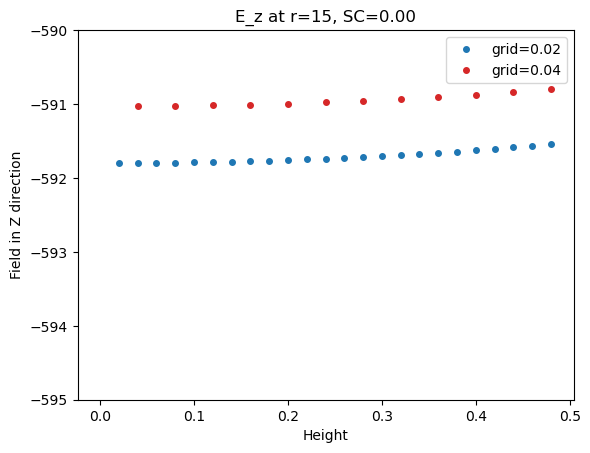

In [6]:
cut1 = ((grid==0.0200) & (rad> 14.98) & (rad<15.02) &(height<0.5))
cut2 = ((grid==0.0400) & (rad> 14.98) & (rad<15.02)&(height<0.5))

plt.plot(height[cut1], field_r[cut1], 'o', markersize=4, color='tab:blue', label='grid='+str(0.020))
plt.plot(height[cut2], field_r[cut2], 'o', markersize=4, color='tab:red', label='grid='+str(0.040))

plt.xlabel('Height')
plt.ylabel('Field in Z direction')
# plt.xlim(0,0.5)
plt.ylim(-595,-590)
# plt.vlines(height[cut1],-5,0)
plt.title("E_z at r=15, SC=0.00")
plt.legend()
plt.savefig("ez_sc0.png")

In [7]:
print(field_r[(height==0.02)&(grid==0.02)&(rad==15)])

[-591.7975463867]


100%|██████████| 6/6 [00:00<00:00, 122.10it/s]


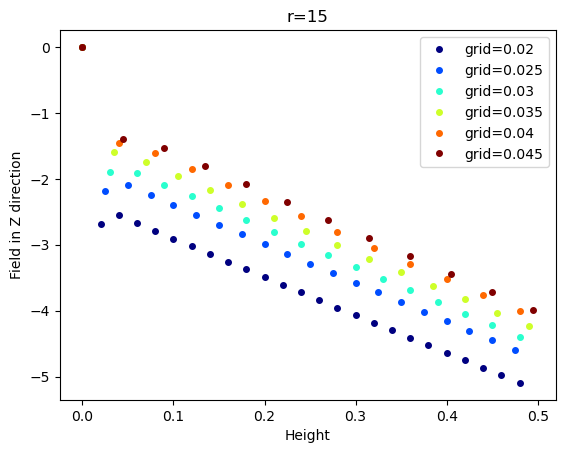

In [8]:
color_array=np.linspace(0,1,11)
cmap = plt.cm.tab20b
color = iter(cm.jet(np.linspace(0, 1, len(np.unique(grid)))))
for g in tqdm(np.unique(grid)):
    cut = ((grid==g) & (rad> 14.98) & (rad<15.02) & (height<0.5))
    hei = height[cut]
    f_r = field_r[cut]
    f_z = field_z[cut]
    time_array=np.linspace(0,(len(f_z)-1)*10,len(f_z))
    c = next(color)
    plt.plot(hei, f_z,'o', markersize=4, c=c, label='grid='+str(g))
    # plt.plot(g, vel_r[0],'o', markersize=5, c=c, label='grid='+str(g))

plt.xlabel('Height')
plt.ylabel('Field in Z direction')
# plt.xlim(0,0.5)
# plt.ylim(0.06,0.10)
plt.title("r=15")
plt.legend()
plt.savefig('figs/field_r.png')

In [9]:
data_dir = '/pscratch/sd/k/kbhimani/siggen_ccd_data/pot_test/'
rad_v =np.array([])
height_v = np.array([])
pot_v=np.array([])
grid_v=np.array([])
rho_h_v=np.array([])
count=0
# data = pd.DataFrame(columns=['r', 'z', 'vel_r', 'vel_z', 'rho'])
data_vel_v = pd.DataFrame()
for f in tqdm(os.listdir(data_dir)):
    if('grid' in data_dir + f):
        grid_test = float(f.split("_")[1])
        f_grid = data_dir  + f
        # if(grid_test!=0.03):
        #     continue
        for f_g in (os.listdir(f_grid)):
            if('data_iter_' in f_g):
                # time_array.append(f_g.split('_')[2].split('.')[0])
                df=pd.read_csv(data_dir+f+'/'+f_g, delimiter=',',names=['r', 'z', 'pot', 'rho'])
                # max_df = df[df.rho == df.rho.max()]#.iloc[0]
                # if(len(max_df)>1):
                #     print("Found it!")
                #     max_df = df[df.rho == df.rho.max()].iloc[0]
                #     break
                # if(grid_test==0.03):
                #     print(df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] < 5.02) & (df['z'] > 4.98)])
                #     break
                try:
                    # rad = np.append(rad, max_df.r.values==15)
                    rad_df = df[(df['r'] < 0.02)]
                    # rad_df = df[(df['r'] < 15.02) & (df['r'] > 14.98) & (df['z'] < 0.12) & (df['z'] > 0.08)]
                    # if(grid_test==0.03):
                    #     print("We shoud append", rad_df)
                    #     break
                    rad_v = np.append(rad_v, rad_df.r.values)
                    height_v = np.append(height_v, rad_df.z.values)
                    pot_v=np.append(pot_v,rad_df.pot.values)
                    rho_h_v=np.append(rho_h_v,rad_df.rho.values)
                    a=np.empty(len(rad_df.pot.values)); a.fill(float(f.split("_")[1]))
                    grid_v=np.append(grid_v,a)
                except IndexError:
                    count+=1
                    continue
                # rad.append(max_df.r.values[0])
                # height.append(max_df.z.values[0])
                # vel.append((max_df.vel_r.values[0]**2 + max_df.vel_z.values[0]**2)**0.5)
                # grid.append(f.split("_")[1])
print("Number skipped was", count)

100%|██████████| 9/9 [00:05<00:00,  1.69it/s]

Number skipped was 0


In [20]:
print(len(pot_v))
print(len(height_v))
print(len(height_v))

10137
10137
10137


100%|██████████| 6/6 [00:00<00:00, 347.48it/s]


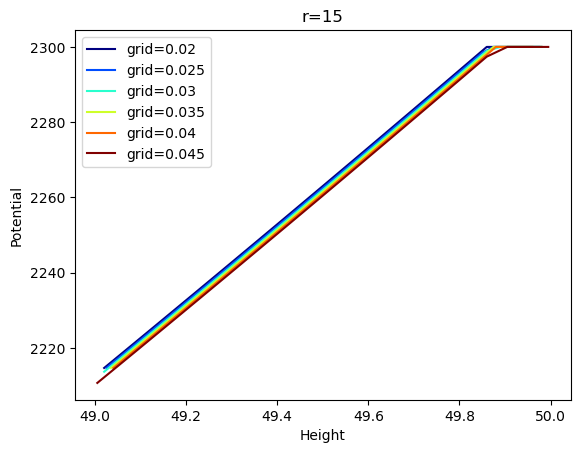

In [27]:
color_array=np.linspace(0,1,11)
cmap = plt.cm.tab20b
color = iter(cm.jet(np.linspace(0, 1, len(np.unique(grid)))))
for g in tqdm(np.unique(grid_v)):
    cut = ((grid_v==g)&(rad_v<0.02) & (height_v<50.0) &(height_v>49) )
    hei_v = height_v[cut]
    v_1 = pot_v[cut]
    time_array=np.linspace(0,(len(f_z)-1)*10,len(f_z))
    c = next(color)
    plt.plot(hei_v, v_1,'-', markersize=4, c=c, label='grid='+str(g))
    # plt.plot(g, vel_r[0],'o', markersize=5, c=c, label='grid='+str(g))
plt.xlabel('Height')
plt.ylabel('Potential')
# plt.xlim(0,0.5)
# plt.ylim(0.06,0.10)
plt.title("r=15")
plt.legend()
# plt.savefig('figs/potential.png')

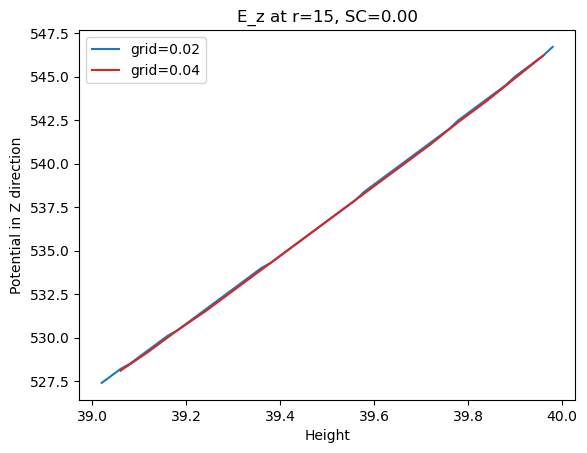

100%|██████████| 9/9 [00:00<00:00, 31.28it/s]


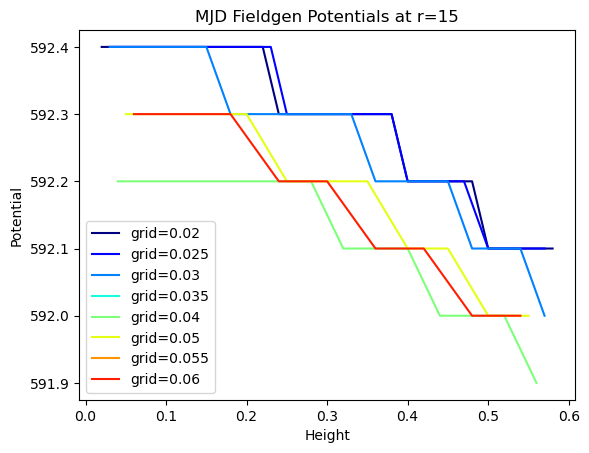